### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from matplotlib.pyplot import figure
import seaborn as sns
sns.set()
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset in Pandas Dataframe

#### Load in the data

In [2]:
df = pd.read_csv("4x1km_corrected.csv")
df = df.iloc[:,1:] # Dropping Index Column
df.head(15)

,AverageDriveForce (lbs),Cadence (stokes/min),DriveLength (meters),DriveTime (ms),ElapsedTime (sec),HRCur (bpm),Horizontal (meters),PeakDriveForce (lbs),Power (watts),Stroke500mPace (sec/500m),StrokeDistance (meters),StrokeRecoveryTime (ms),lapIdx,latitude,longitude,TimeStamp (sec),bearing,vwind,winddirection,nowindpace
0,0.000000,0,0.00,0.000000,1,74,0.000000,0,0.000000,611.524142,2.463387,0.000000,0,49.238819,16.513666,0,274.496508,2,280,300.000000
1,0.000000,0,0.00,0.000000,2,74,0.072623,0,0.000000,541.853334,2.722691,0.000000,0,49.238819,16.513665,1,251.344824,2,280,300.000000
2,0.000000,0,0.00,0.000000,3,74,0.295082,0,0.000000,477.142289,3.009290,0.000000,0,49.238817,16.513665,2,251.950763,2,280,300.000000
3,0.000000,27,0.00,0.000000,4,71,3.209189,0,0.000000,323.354779,3.401119,0.000000,0,49.238792,16.513653,3,275.393491,2,280,300.000000
4,0.000000,27,0.00,0.000000,5,71,3.443202,0,0.000000,350.902384,3.741406,0.000000,0,49.238794,16.513652,4,268.678317,2,280,300.000000
5,0.000000,27,0.00,0.000000,6,71,3.576041,0,0.000000,342.988649,4.262430,0.000000,0,49.238793,16.513651,5,278.892640,2,280,300.000000
6,0.000000,27,0.00,0.000000,7,71,4.309900,0,0.000000,316.010233,4.925474,0.000000,0,49.238796,16.513642,6,284.551496,2,280,300.000000
7,0.000000,18,0.00,0.000000,8,71,6.082228,0,0.000000,281.846471,5.661698,0.000000,0,49.238806,16.513623,7,288.469040,2,280,300.000000
8,0.000000,18,0.00,0.000000,9,71,8.108912,0,0.000000,260.585778,6.129212,0.000000,0,49.238818,16.513602,8,291.204874,2,280,300.000000
9,0.000000,18,0.00,0.000000,10,71,10.008030,0,0.000000,246.852420,6.819077,0.000000,0,49.238829,16.513582,9,293.114323,2,280,300.000000


In [3]:
# Dropping Non-Meaningful Columns
df.drop([' PeakDriveForce (lbs)',' lapIdx'], axis=1, inplace=True)

#### Checking number of rows and columns

In [4]:
df.shape

(2938, 18)

#### Showing descriptive statistics of each column

In [5]:
df.describe()

,AverageDriveForce (lbs),Cadence (stokes/min),DriveLength (meters),DriveTime (ms),ElapsedTime (sec),HRCur (bpm),Horizontal (meters),Power (watts),Stroke500mPace (sec/500m),StrokeDistance (meters),StrokeRecoveryTime (ms),latitude,longitude,TimeStamp (sec),bearing,vwind,winddirection,nowindpace
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.0,2938.0,2938.000000
mean,62.461850,18.660654,0.913938,638.904027,1505.698775,150.169843,4468.477071,176.006106,1.096587e+13,1.031840e+01,1224.025717,49.241149,16.505975,1504.698775,1.599414e+02,2.0,280.0,197.980960
std,48.678929,7.130637,0.631403,457.952888,865.378249,17.857494,2945.945568,150.317987,8.394660e+13,2.951296e+01,938.802664,0.005056,0.006603,865.378249,1.163812e+02,0.0,0.0,73.882623
min,0.000000,0.000000,0.000000,0.000000,1.000000,71.000000,0.000000,0.000000,9.370984e+01,1.170000e-11,0.000000,49.230387,16.492067,0.000000,1.710000e-11,2.0,280.0,116.051925
25%,0.000000,11.000000,0.000000,0.000000,777.250000,137.000000,2203.588712,0.000000,1.370945e+02,6.699524e+00,0.000000,49.239275,16.500922,776.250000,1.136204e+02,2.0,280.0,131.979968
50%,74.824742,18.000000,1.350000,857.328750,1511.500000,142.000000,4660.751481,176.996902,1.560033e+02,8.796164e+00,1403.950404,49.240278,16.507418,1510.500000,1.364590e+02,2.0,280.0,161.738866
75%,105.761361,26.000000,1.350000,991.689073,2245.750000,170.000000,7113.091116,321.391944,3.203224e+02,1.012193e+01,2156.708776,49.245229,16.512293,2244.750000,3.036119e+02,2.0,280.0,300.000000
max,149.879467,29.000000,1.350000,1398.000000,2996.000000,175.000000,9240.797772,481.041180,1.030000e+15,9.013407e+02,4234.765235,49.249508,16.513880,2995.000000,3.361841e+02,2.0,280.0,300.000000


#### Checking Null values and their datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    AverageDriveForce (lbs)    2938 non-null   float64
 1    Cadence (stokes/min)       2938 non-null   int64  
 2    DriveLength (meters)       2938 non-null   float64
 3    DriveTime (ms)             2938 non-null   float64
 4    ElapsedTime (sec)          2938 non-null   int64  
 5    HRCur (bpm)                2938 non-null   int64  
 6    Horizontal (meters)        2938 non-null   float64
 7    Power (watts)              2938 non-null   float64
 8    Stroke500mPace (sec/500m)  2938 non-null   float64
 9    StrokeDistance (meters)    2938 non-null   float64
 10   StrokeRecoveryTime (ms)    2938 non-null   float64
 11   latitude                   2938 non-null   float64
 12   longitude                  2938 non-null   float64
 13  TimeStamp (sec)             2938 

#### Viewing correlation of each variable

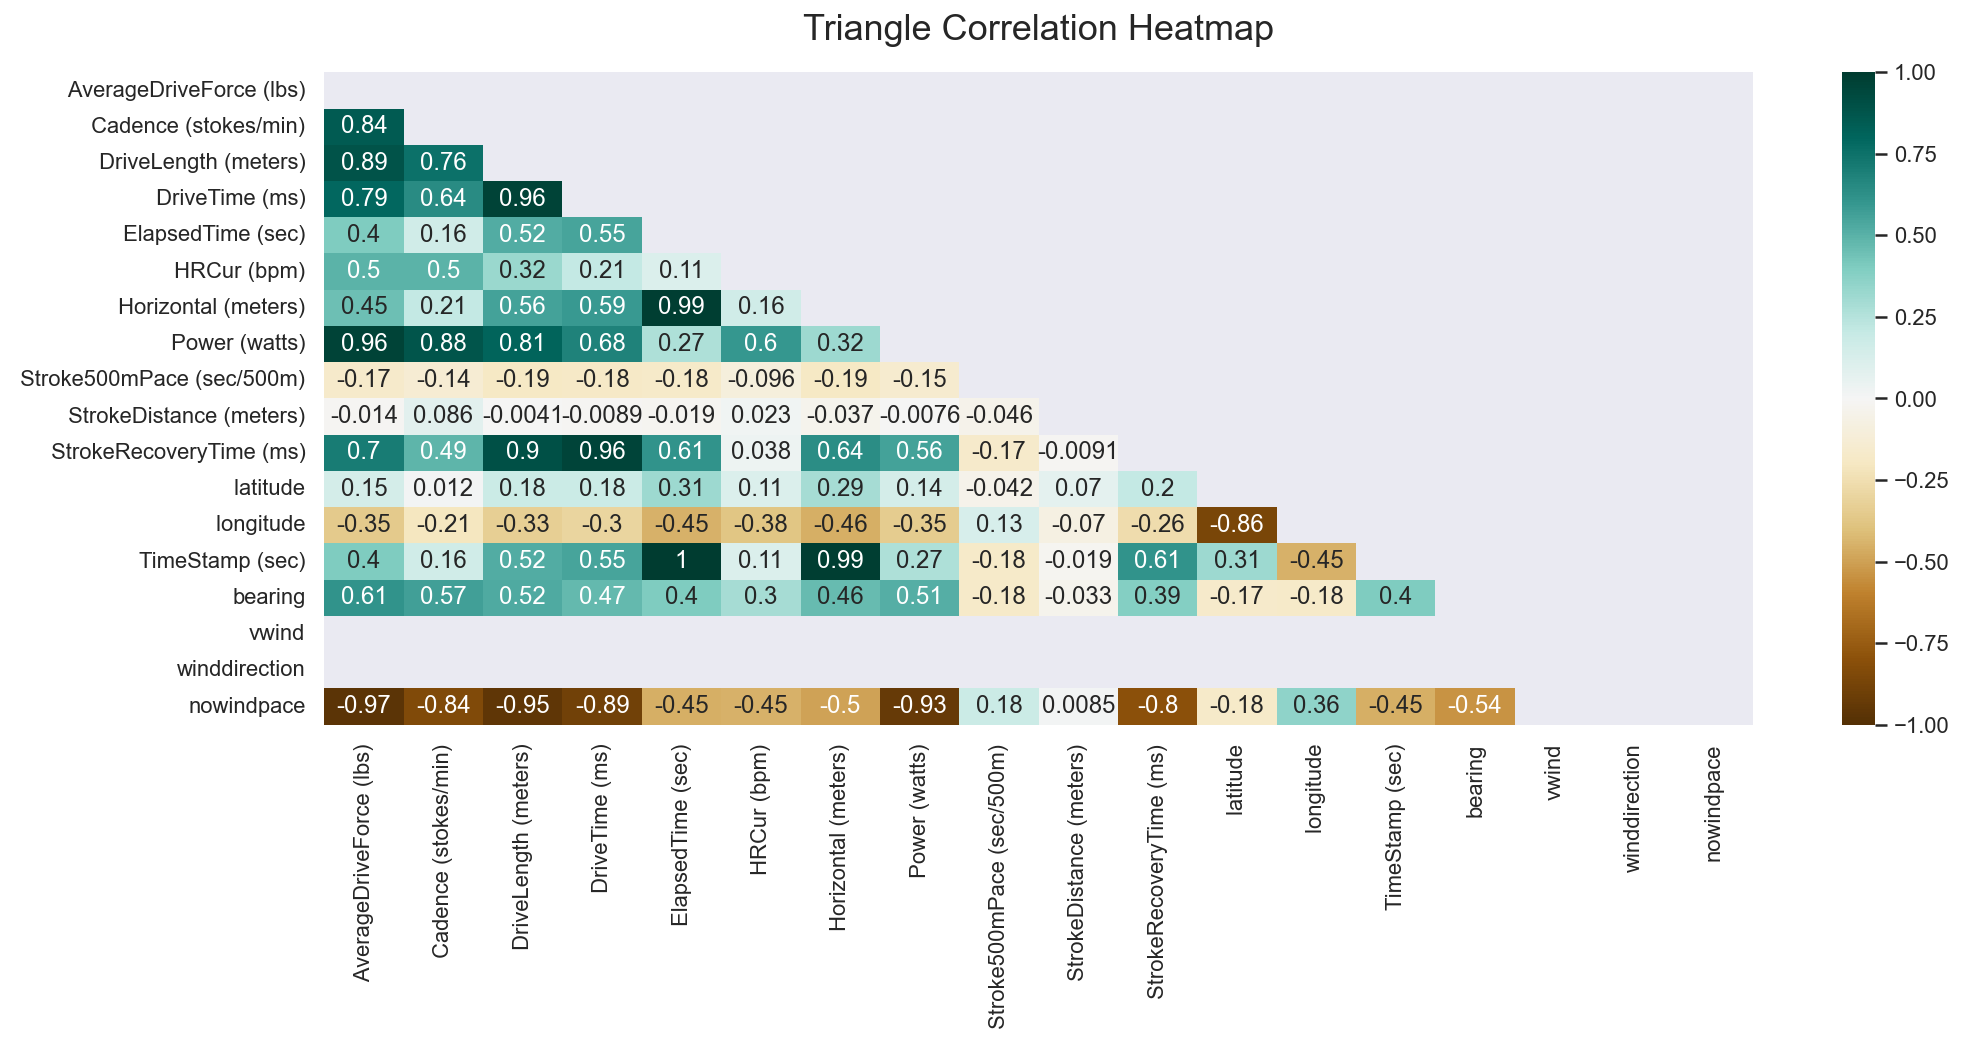

In [7]:
np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### KMeans: Find the Clusters

In this step, we will use k-means clustering to cluster our two target variables, AverageDriveForce and Power. To do this, we will first fit these variables to the k-means algorithm and determine the best number of clusters. Determining the ideal number of clusters for our k-means model can be done by measuring the sum of the squared distances to the nearest cluster center aka inertia. Much like the scree plot in fig. 1 for PCA, the k-means scree plot below indicates the percentage of variance explained, but in slightly different terms, as a function of the number of clusters.

In [8]:
# Choosing features that has strong correlation with average driveforce and power
x = df[[' AverageDriveForce (lbs)', ' Cadence (stokes/min)',' DriveLength (meters)', ' DriveTime (ms)',' Power (watts)',
        ' StrokeRecoveryTime (ms)','bearing',' HRCur (bpm)']]
x.tail()

,AverageDriveForce (lbs),Cadence (stokes/min),DriveLength (meters),DriveTime (ms),Power (watts),StrokeRecoveryTime (ms),bearing,HRCur (bpm)
2933,53.087805,18,1.35,1146.913115,128.110614,2219.099957,120.965164,135
2934,51.395658,18,1.35,1156.156156,125.643520,2177.177177,117.790635,135
2935,51.395658,17,1.35,1156.156156,125.643520,2177.177177,112.063676,134
2936,51.395658,17,1.35,1156.156156,125.643520,2177.177177,100.474978,134
2937,51.395658,17,1.35,1156.156156,125.643520,2177.177177,59.883761,134


In [9]:
scaled_X = StandardScaler().fit_transform(x)

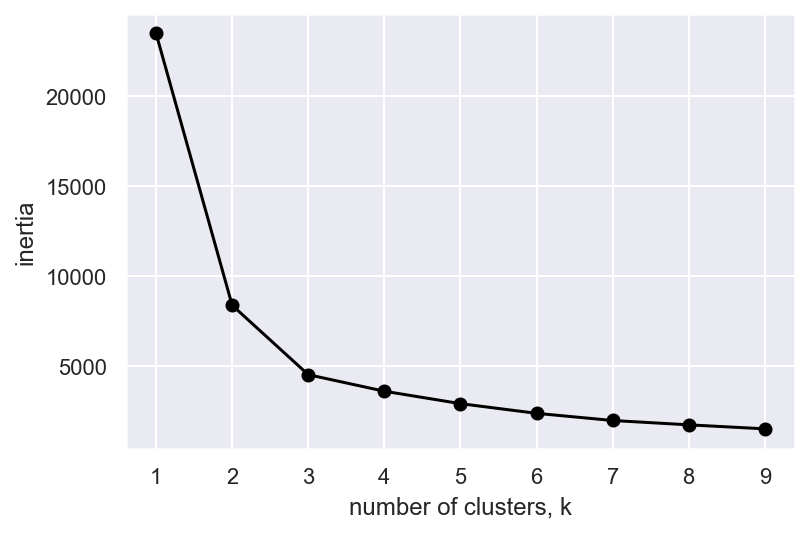

In [10]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(scaled_X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


Fig. 3 shows that after 2 clusters(at the elbow), the change in the value of inertia is no longer significant, and most likely, neither is the variance of the rest of the data after the elbow point. Therefore we can discard everything after k=2 and proceed to the last step in the process.

### Visualize and Interpret the Clusters

I did this project with a basic question in mind: can people be grouped based on rowing performance? Reducing all those features down to principal components and then visualizing the clusters in those principal components using k-means hints that the answer to my question is most likely yes.

In [11]:
# finding the clusters based on input matrix "x"
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
y_clusters = model.fit_predict(scaled_X)
x['clusters'] = y_clusters
x.head(15)

,AverageDriveForce (lbs),Cadence (stokes/min),DriveLength (meters),DriveTime (ms),Power (watts),StrokeRecoveryTime (ms),bearing,HRCur (bpm),clusters
0,0.000000,0,0.00,0.000000,0.000000,0.000000,274.496508,74,1
1,0.000000,0,0.00,0.000000,0.000000,0.000000,251.344824,74,1
2,0.000000,0,0.00,0.000000,0.000000,0.000000,251.950763,74,1
3,0.000000,27,0.00,0.000000,0.000000,0.000000,275.393491,71,1
4,0.000000,27,0.00,0.000000,0.000000,0.000000,268.678317,71,1
5,0.000000,27,0.00,0.000000,0.000000,0.000000,278.892640,71,1
6,0.000000,27,0.00,0.000000,0.000000,0.000000,284.551496,71,1
7,0.000000,18,0.00,0.000000,0.000000,0.000000,288.469040,71,1
8,0.000000,18,0.00,0.000000,0.000000,0.000000,291.204874,71,1
9,0.000000,18,0.00,0.000000,0.000000,0.000000,293.114323,71,1


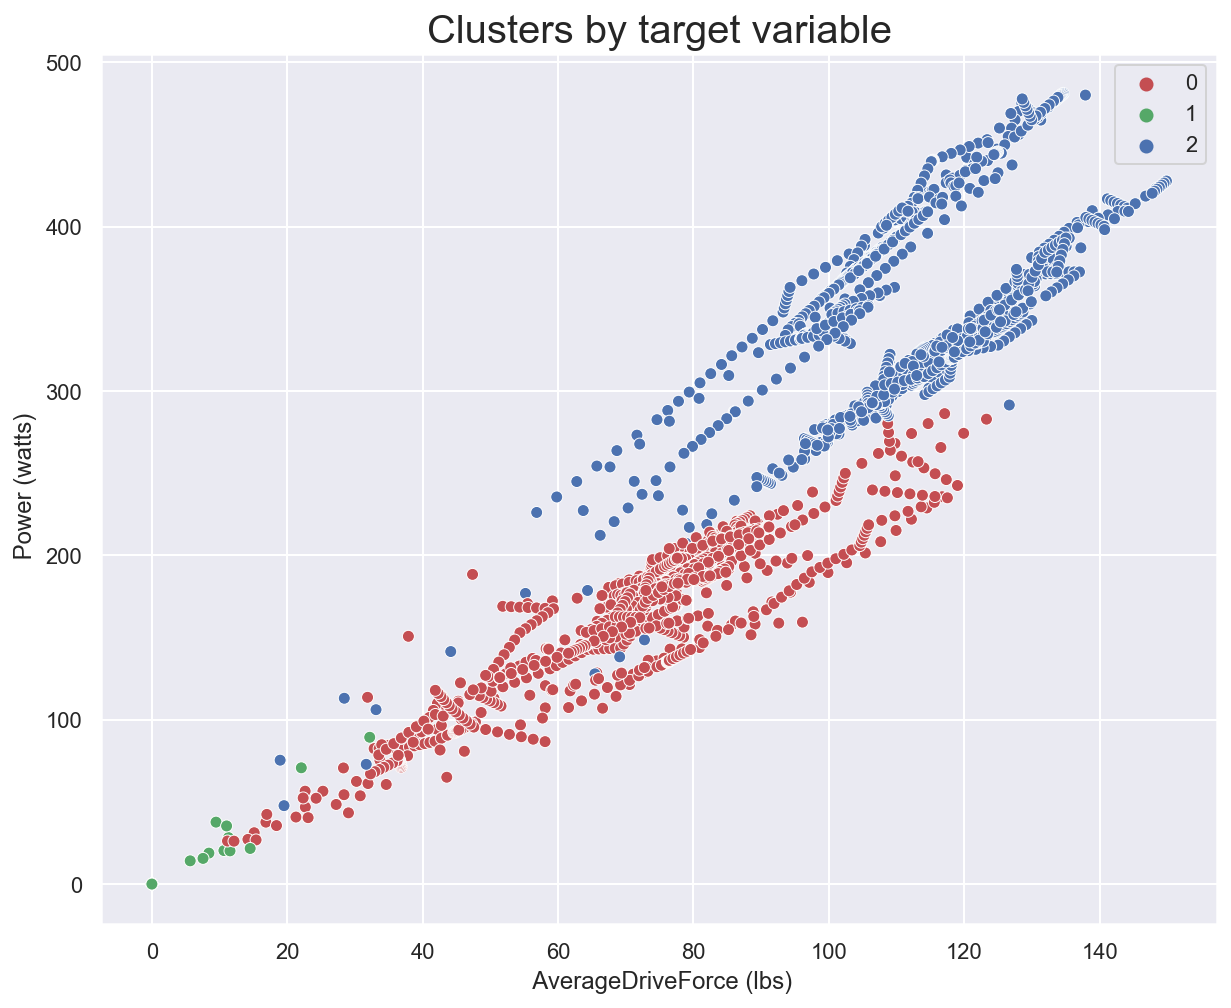

In [12]:
x_axis = x[' AverageDriveForce (lbs)']
y_axis = x[' Power (watts)']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = y_clusters,palette = ['r','g','b'])
plt.title('Clusters by target variable', fontsize = 20)
plt.show()

###  Classification Analysis using Kmeans Dataset

#### Visualizing the Correlation of Components with Clusters

In [13]:
df['labels'] = y_clusters


#### Splitting Data into Train/Test

In [14]:
# split dataset in features and target variable
X = df.drop(['labels','vwind','winddirection',' Stroke500mPace (sec/500m)', ' StrokeDistance (meters)',' longitude',
            ' latitude',' DriveLength (meters)',' DriveTime (ms)'],axis=1)      
y = df.labels # Target variable

In [15]:
# Train/Test Split
# 70% training and 40% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify = y) 

#### Creating Classifier Models Pipeline

In order to create a pipeline, I append the default state of all classification algorithms mentioned above into the model list and then iterate through them to train, test, predict and evaluate.

In [16]:
model_pipeline = []
model_pipeline.append(LogisticRegression(solver='liblinear'))
model_pipeline.append(SVC())
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(DecisionTreeClassifier())
model_pipeline.append(RandomForestClassifier())
model_pipeline.append(GaussianNB())

In [17]:
model_list = ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'] # Creating model list
acc_list = [] # Accuracy Empty List
auc_list = [] # AUC Empty List
cm_list = [] # Confusion Matrix Empty List
precision_list = [] #Precision Empty List
recall_list = [] #Recall Empty List

for model in model_pipeline: # Initializing Loop
    model.fit(X_train, y_train) # Fitting each Algorithm one by one
    y_pred = model.predict(X_test) # Predicing values of each algorithm ony by one
    acc_list.append(metrics.accuracy_score(y_test, y_pred)) # Appending accuracy of each model to acc_list
    fpr, tpr, _thresholds = metrics.roc_curve(y_test, y_pred,pos_label=1) # calculating roc of each model to find auc
    auc_list.append((round(metrics.auc(fpr, tpr),2))) # Appending AUC of each model to auc_list
    cm_list.append(confusion_matrix(y_test, y_pred)) # Appending CM of each model to cm_list
    precision_list.append(metrics.precision_score(y_test, y_pred, average='micro')) # Appending precision of each model to precision_list
    recall_list.append(metrics.recall_score(y_test, y_pred, average='micro')) # Appending recall_score of each model to recall_list

### Comparing Confusion Matrix of Classifiers

Confusion matrix indicates the actual values vs. predicted values and summarize the true negative, false positive, false negative and true positive values in a matrix format.

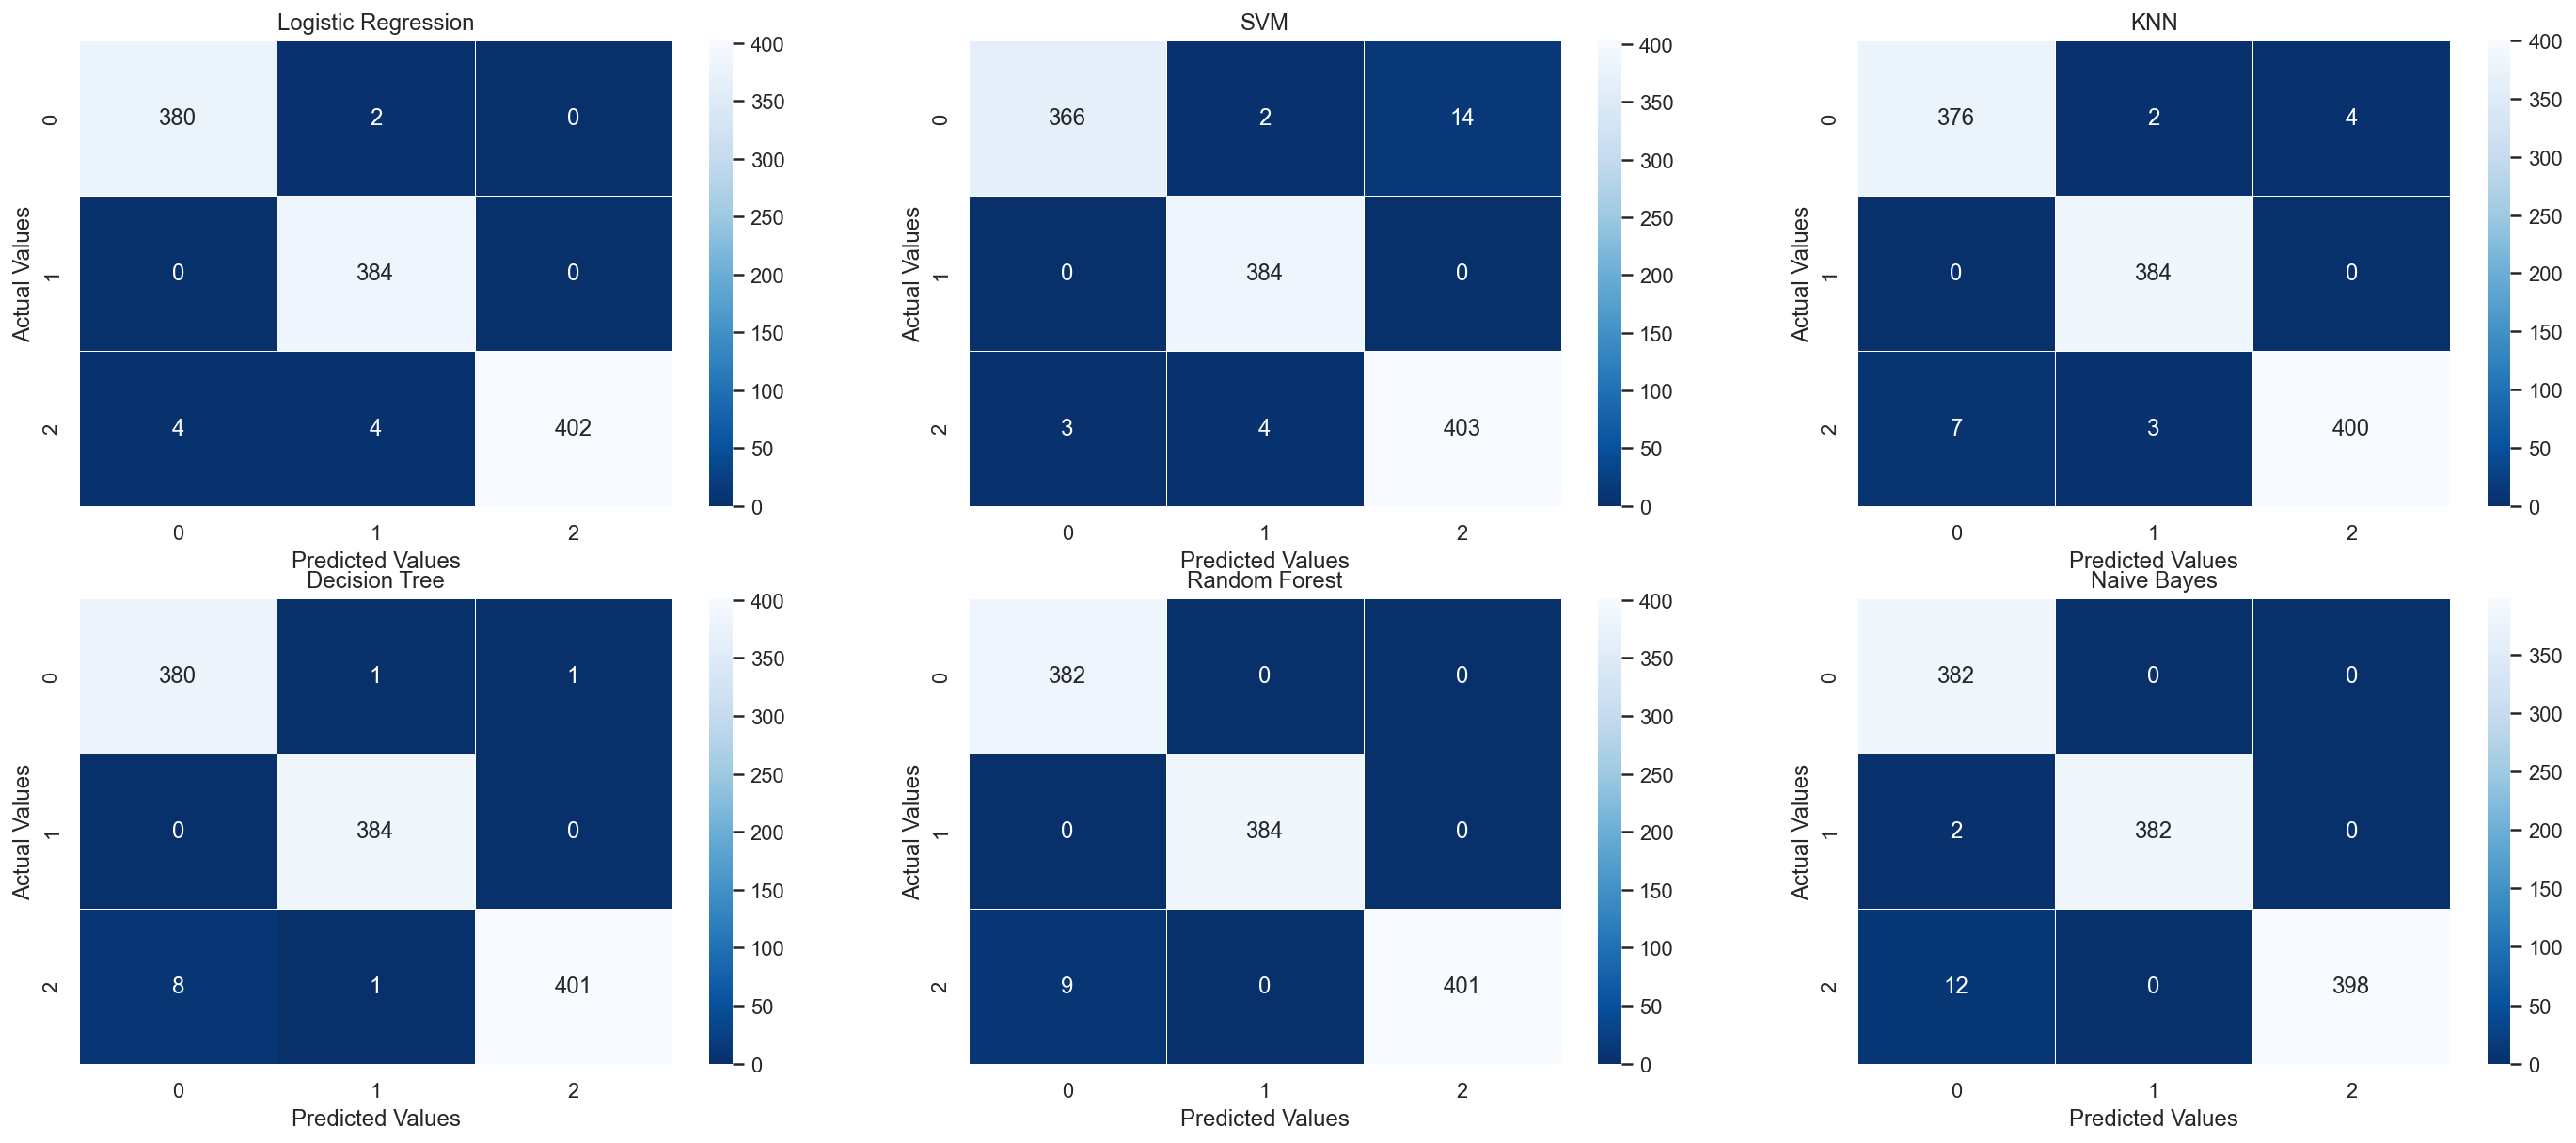

In [18]:
## plot confuston matrix
fig = plt.figure(figsize = (24,10))
for i in range(len(cm_list)):
    cm = cm_list[i] 
    model = model_list[i] 
    sub = fig.add_subplot(2, 3, i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap = 'Blues_r', linewidths=0.4, annot_kws={"size":12}, fmt='g') # Drawing CM
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values') 

### Comparing AUC and Accuracy of the Models

Accuracy is the most straightforward indicator of the model performance. It measure the percentage of accurate predictions: accuracy = (true positive + true negative) / (true positive + false positive + false negative + false positive)+

ROC is the plot of true positive rate against false positive rate at various classification threshold. AUC is the area under the ROC curve, and higher AUC indicates better model performance.

In [19]:
# accuracy and AUC
result_df = pd.DataFrame({'Model' :model_list, 'Accuracy': acc_list, 'AUC': auc_list,
                         'Precision' :precision_list,'Recall' :recall_list}) 

In [20]:
# Adding mean and standard deviation of each classification.
result_df["Mean"] = result_df.iloc[:,1:].mean(axis = 1)
result_df["Median"] = result_df.iloc[:,1:].median(axis = 1)
result_df["Std"] = result_df.iloc[:,1:].std(axis = 1)

In [21]:
result_df 

,Model,Accuracy,AUC,Precision,Recall,Mean,Median,Std
0,Logistic Regression,0.991497,0.49,0.991497,0.991497,0.866122,0.991497,0.200860
1,SVM,0.980442,0.47,0.980442,0.980442,0.852832,0.980442,0.204443
2,KNN,0.986395,0.49,0.986395,0.986395,0.862296,0.986395,0.198816
3,Decision Tree,0.990646,0.49,0.990646,0.990646,0.865485,0.990646,0.200519
4,Random Forest,0.992347,0.49,0.992347,0.992347,0.866760,0.992347,0.201200
5,Naive Bayes,0.988095,0.50,0.988095,0.988095,0.866071,0.988095,0.195492
